In [21]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [22]:
path = 'Data_paths.csv'
df_path = pd.read_csv(path)

In [23]:
df_path = df_path.groupby('moa').sample(n=3000, random_state=0).reset_index(drop=True)

In [24]:
df_path.moa.value_counts()

Actin disruptors             3000
Aurora kinase inhibitors     3000
Cholesterol-lowering         3000
DMSO                         3000
DNA damage                   3000
DNA replication              3000
Eg5 inhibitors               3000
Epithelial                   3000
Kinase inhibitors            3000
Microtubule destabilizers    3000
Microtubule stabilizers      3000
Protein degradation          3000
Protein synthesis            3000
Name: moa, dtype: int64

In [25]:
N = df_path.shape[0]
X = np.empty(shape=(N,68,68,3), dtype="int16")

In [26]:
for index, path in tqdm(enumerate(df_path['path']), total = N):
    image = np.load(path)
    X[index,:,:,:] = image
np.save('pca_X.npy', X)
print(X.shape)

100%|██████████| 39000/39000 [00:22<00:00, 1756.99it/s]


(39000, 68, 68, 3)


In [27]:
X = X/255
dmsomean = np.load('DMSONormalizedMean.npy')
X = X - dmsomean
X = X.reshape(X.shape[0], -1)


In [28]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, df_path['moa'], test_size = 0.25, random_state=0, shuffle = True, stratify=df_path['moa'])

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3000)
pca.fit(X_train)

PCA(n_components=3000)

Text(0.5, 1.0, 'Eigenvalues of the principle components')

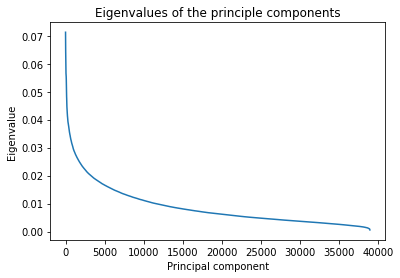

In [44]:
py = np.sort(np.diag(np.cov(X)))[::-1]
plt.plot(py)
plt.ylabel('Eigenvalue')
plt.xlabel('Principal component')
plt.title('Eigenvalues of the principle components')

In [11]:
# plt.plot(range(pca.singular_values_), pca.singular_values_)

Text(0.5, 1.0, 'Explained variance of the individual components')

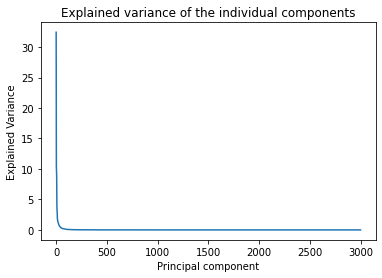

In [45]:
plt.plot(pca.explained_variance_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal component')
plt.title('Explained variance of the individual components')

153.15151980031519


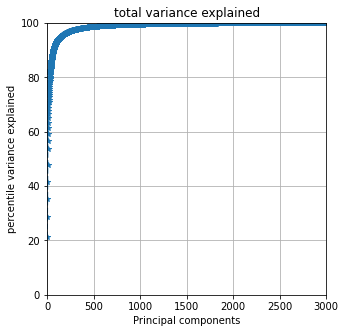

In [46]:

fig = plt.figure(figsize=(5,5))
K=3000

total_variance_explained = np.zeros(min(pca.explained_variance_.shape[0],K))
for i in range(K):
    total_variance_explained[i] = np.sum(pca.explained_variance_[:i+1])
    
print(np.sum(pca.explained_variance_))
plt.plot(range(1,K+1),100*total_variance_explained/sum(pca.explained_variance_),"--*")
plt.grid();
plt.title('total variance explained')
plt.ylim(0,100)
plt.xlim(0,K)
plt.xlabel('Principal components')
plt.ylabel('percentile variance explained')
plt.show();

153.15151980031519


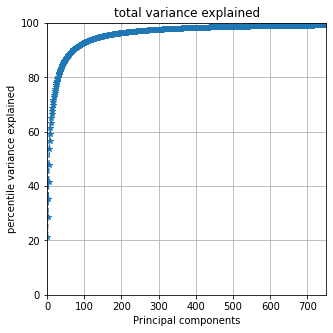

In [72]:

fig = plt.figure(figsize=(5,5))
K=750

total_variance_explained = np.zeros(min(pca.explained_variance_.shape[0],K))
for i in range(K):
    total_variance_explained[i] = np.sum(pca.explained_variance_[:i+1])
    
print(np.sum(pca.explained_variance_))
plt.plot(range(1,K+1),100*total_variance_explained/sum(pca.explained_variance_),"--*")
plt.grid();
plt.title('total variance explained')
plt.ylim(0,100)
plt.xlim(0,K)
plt.xlabel('Principal components')
plt.ylabel('percentile variance explained')
plt.show();

In [73]:
pc = np.zeros(pca.components_.shape)
for index, component in enumerate(pca.components_):
    pc[index] = (component - np.min(component))/(np.max(component)-np.min(component))


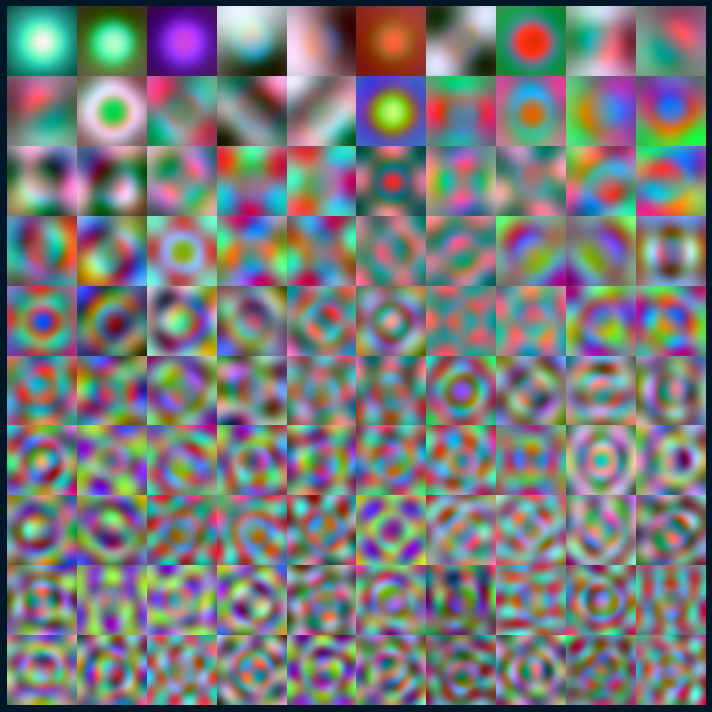

In [74]:

size = 10
# plt.figure(figsize=(size*3,size*3))
# axs = [plt.subplot(size, size, i+1) for i in range(size**2)]
# for i in range(size**2):
#     axs[i].axis('off')
#     axs[i].set_aspect('equal')
#     axs[i].imshow(pc[i].reshape(68,68,3))

fig, axs = plt.subplots(size, size, figsize=(size,size), gridspec_kw=dict(hspace=0, wspace=0), facecolor = "#011627")
for x in range(size):
    for y in range(size):
        i = x*size+y
        axs[x,y].axis('off')
        axs[x,y].set_aspect('equal')
        axs[x,y].imshow(pc[i].reshape(68,68,3))
fig.tight_layout()
plt.show()



In [75]:
z_train = pca.transform(X_train)
z_test = pca.transform(X_test)

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)
print(le.classes_)

['Actin disruptors' 'Aurora kinase inhibitors' 'Cholesterol-lowering'
 'DMSO' 'DNA damage' 'DNA replication' 'Eg5 inhibitors' 'Epithelial'
 'Kinase inhibitors' 'Microtubule destabilizers' 'Microtubule stabilizers'
 'Protein degradation' 'Protein synthesis']


In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [12]:
import seaborn as sns

0.07692307692307693 0.01098901098901099


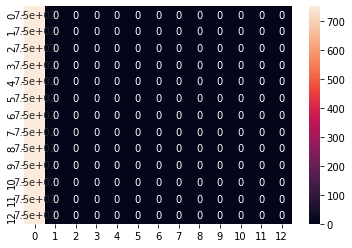

In [13]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train ,y_train_encoded)
dummy_acc_score = dummy_clf.score(X_test, y_test_encoded)
y_pred = dummy_clf.predict(X_test)
dummy_f1_score = f1_score(y_test_encoded, y_pred, average='weighted')
dummy_cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(dummy_cm, annot=True)
print(dummy_acc_score, dummy_f1_score)

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train ,y_train_encoded)
dummy_acc_score = dummy_clf.score(X_test, y_test_encoded)
y_pred = dummy_clf.predict(X_test)
dummy_f1_score = f1_score(y_test_encoded, y_pred, average='weighted')
dummy_cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(dummy_cm, annot=True)
print(dummy_acc_score, dummy_f1_score)

0.08205128205128205 0.07750229367965665


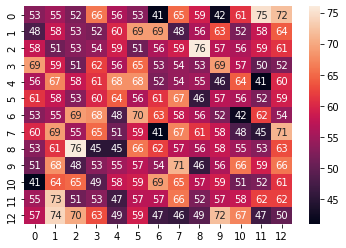

In [79]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train ,y_train_encoded)
dummy_acc_score = dummy_clf.score(X_test, y_test_encoded)
y_pred = dummy_clf.predict(X_test)
dummy_f1_score = f1_score(y_test_encoded, y_pred, average='weighted')
dummy_cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(dummy_cm, annot=True)
print(dummy_acc_score, dummy_f1_score)

0.23887179487179488 0.21335301022755654


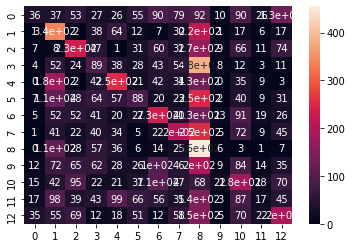

In [80]:
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train_encoded)
NB_acc_score = NB_clf.score(X_test, y_test_encoded)
y_pred = NB_clf.predict(X_test)
NB_f1_score = f1_score(y_test_encoded,y_pred, average='weighted')
NB_cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(NB_cm, annot=True)
print(NB_acc_score, NB_f1_score)

Iteration 1, loss = 3.21135769
Iteration 2, loss = 3.04366816
Iteration 3, loss = 3.01719075
Iteration 4, loss = 2.88792701
Iteration 5, loss = 2.77455232
Iteration 6, loss = 2.78385871
Iteration 7, loss = 2.71948523
Iteration 8, loss = 2.68315311
Iteration 9, loss = 2.63247542
Iteration 10, loss = 2.60340930
Iteration 11, loss = 2.58526304
Iteration 12, loss = 2.63706280
Iteration 13, loss = 2.49987180
Iteration 14, loss = 2.49077918
Iteration 15, loss = 2.53071664
Iteration 16, loss = 2.54050384
Iteration 17, loss = 2.44841592
Iteration 18, loss = 2.41268848
Iteration 19, loss = 2.42181598
Iteration 20, loss = 2.45260497
Iteration 21, loss = 2.36948994
Iteration 22, loss = 2.34467647
Iteration 23, loss = 2.34698831
Iteration 24, loss = 2.32511929
Iteration 25, loss = 2.32961709
Iteration 26, loss = 2.27951103
Iteration 27, loss = 2.28635338
Iteration 28, loss = 2.26708282
Iteration 29, loss = 2.25206768
Iteration 30, loss = 2.25484071
Iteration 31, loss = 2.23185428
Iteration 32, los

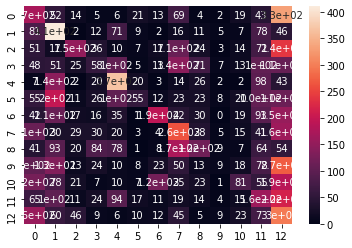

In [31]:
MLP_clf = MLPClassifier(max_iter = 1000, learning_rate_init=0.01, batch_size = 32, verbose = True)
MLP_clf.fit(X_train, y_train_encoded)
MLP_acc_score = MLP_clf.score(X_test, y_test_encoded)
y_pred = MLP_clf.predict(X_test)
MLP_f1_score = f1_score(y_test_encoded,y_pred, average='weighted')
MLP_cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(MLP_cm, annot=True)
print(MLP_acc_score, MLP_f1_score)

0.07476923076923077 0.07470106912738812


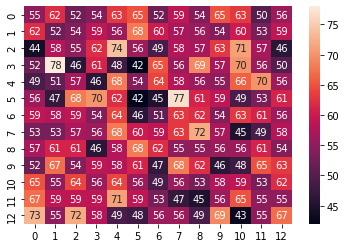

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(z_train ,y_train_encoded)
dummy_acc_score = dummy_clf.score(z_test, y_test_encoded)
y_pred = dummy_clf.predict(z_test)
dummy_f1_score = f1_score(y_test_encoded, y_pred, average='weighted')
dummy_cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(dummy_cm, annot=True)
print(dummy_acc_score, dummy_f1_score)

0.16564102564102565 0.14461615951067858


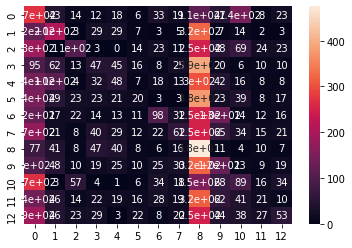

In [ ]:
NB_clf = GaussianNB()
NB_clf.fit(z_train, y_train_encoded)
NB_acc_score = NB_clf.score(z_test, y_test_encoded)
y_pred = NB_clf.predict(z_test)
NB_f1_score = f1_score(y_test_encoded,y_pred, average='weighted')
NB_cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(NB_cm, annot=True)
print(NB_acc_score, NB_f1_score)

Iteration 1, loss = 2.14724883
Iteration 2, loss = 1.85710074
Iteration 3, loss = 1.62968097
Iteration 4, loss = 1.40655954
Iteration 5, loss = 1.22580947
Iteration 6, loss = 1.07024614
Iteration 7, loss = 1.03347350
Iteration 8, loss = 0.94832866
Iteration 9, loss = 0.92198170
Iteration 10, loss = 0.87370343
Iteration 11, loss = 0.88261064
Iteration 12, loss = 0.87029416
Iteration 13, loss = 0.85938562
Iteration 14, loss = 0.89787802
Iteration 15, loss = 0.82829093
Iteration 16, loss = 0.86427271
Iteration 17, loss = 0.88142900
Iteration 18, loss = 0.90064734
Iteration 19, loss = 0.84117559
Iteration 20, loss = 0.88201719
Iteration 21, loss = 0.87064063
Iteration 22, loss = 0.90745416
Iteration 23, loss = 0.86610949
Iteration 24, loss = 0.85590978
Iteration 25, loss = 0.90263528
Iteration 26, loss = 0.86927239
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.3042051282051282 0.30570529068485425


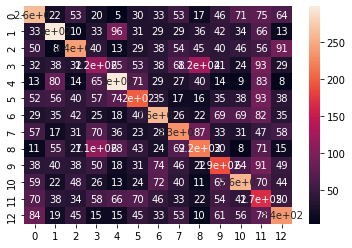

In [ ]:
MLP_clf = MLPClassifier(max_iter = 1000, learning_rate_init=0.01, batch_size = 32, verbose = True)
MLP_clf.fit(z_train, y_train_encoded)
MLP_acc_score = MLP_clf.score(z_test, y_test_encoded)
y_pred = MLP_clf.predict(z_test)
MLP_f1_score = f1_score(y_test_encoded,y_pred, average='weighted')
MLP_cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(MLP_cm, annot=True)
print(MLP_acc_score, MLP_f1_score)